In [1]:
from pathlib import Path
import geopandas

In [2]:
path_obj = Path("./data/street-tree-data-1.geojson")
df_trees = geopandas.read_file(path_obj)

DriverError: data/street-tree-data-1.geojson: No such file or directory

In [ ]:
path_obj = Path("./data/toronto-city-wards.geojson")
df_wards = geopandas.read_file(path_obj)

In [ ]:
df_trees_by_wards = df_trees.groupby("WARD").agg({"OBJECTID": "nunique"}).reset_index()

In [ ]:
df_trees_by_wards["WARD"] = df_trees_by_wards["WARD"].astype("int32")
df_trees_by_wards.rename(
    columns={"WARD": "AREA_SHORT_CODE", "OBJECTID": "TREE_COUNT"},
    inplace=True,
)
df_trees_by_wards.tail()

,AREA_SHORT_CODE,TREE_COUNT
20,21,17664
21,22,19974
22,23,22318
23,24,20657
24,25,25310


In [ ]:
df = df_wards.merge(df_trees_by_wards, on="AREA_SHORT_CODE")
df.head().transpose()

,0,1,2,3,4
_id,2876,2877,2878,2879,2880
AREA_ID,2457740,2457739,2457738,2457737,2457736
DATE_EFFECTIVE,2018-08-07T18:11:06,2018-08-07T18:11:06,2018-08-07T18:11:06,2018-08-07T18:11:06,2018-08-07T18:11:06
DATE_EXPIRY,3000-01-01T05:00:00,3000-01-01T05:00:00,3000-01-01T05:00:00,3000-01-01T05:00:00,3000-01-01T05:00:00
AREA_ATTR_ID,25993196,25993195,25993194,25993193,25993192
AREA_TYPE_ID,528,528,528,528,528
PARENT_AREA_ID,None,None,None,None,None
AREA_TYPE,CITW,CITW,CITW,CITW,CITW
AREA_CLASS_ID,None,None,None,None,None
AREA_CLASS,None,None,None,None,None


<AxesSubplot:>

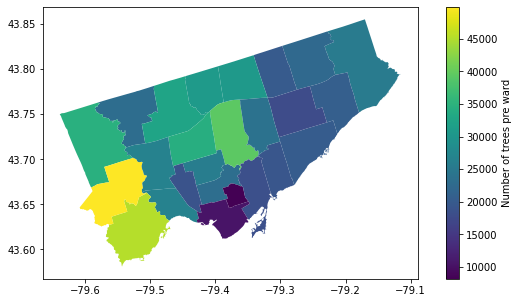

In [ ]:
df.plot(
    column="TREE_COUNT",
    legend=True,
    figsize=(10, 5),
    legend_kwds={
        "label": "Number of trees pre ward",
        "orientation": "vertical",
    },
)